In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


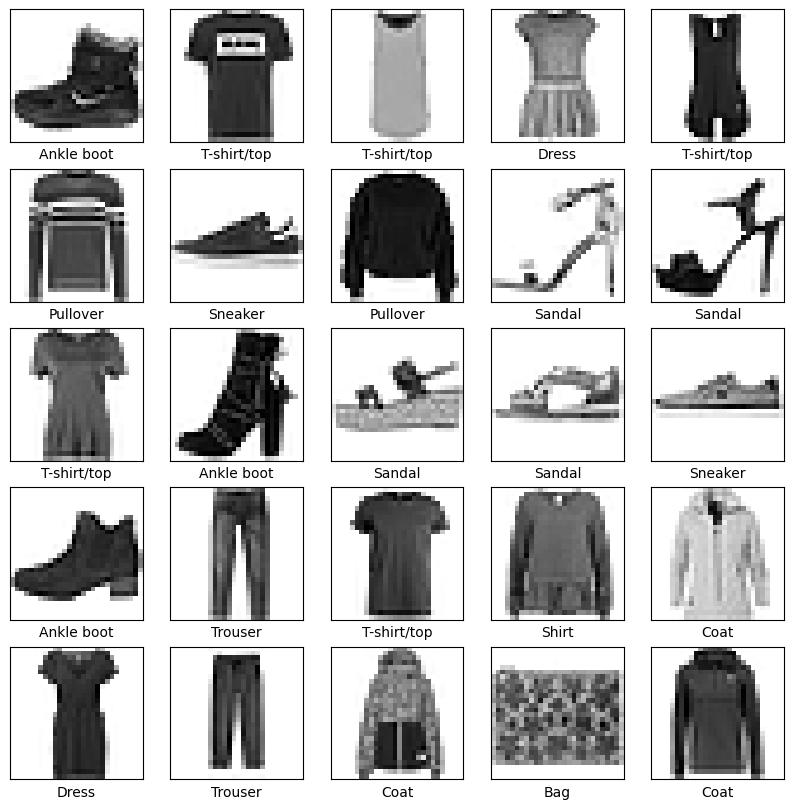

In [3]:
# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
#input pipeline
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add an extra dimension for the color channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [5]:
# Define the CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 19s 4ms/step - loss: 0.4613 - accuracy: 0.8321 - val_loss: 0.3654 - val_accuracy: 0.8655
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3093 - accuracy: 0.8867 - val_loss: 0.3055 - val_accuracy: 0.8907
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2661 - accuracy: 0.9025 - val_loss: 0.2786 - val_accuracy: 0.8991
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2341 - accuracy: 0.9133 - val_loss: 0.3140 - val_accuracy: 0.8848
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2111 - accuracy: 0.9218 - val_loss: 0.2553 - val_accuracy: 0.9053
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1917 - accuracy: 0.9290 - val_loss: 0.2586 - val_accuracy: 0.9100
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1732 - accuracy: 0.9357 - val_loss: 0.2685 - val_accuracy

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.4606 - accuracy: 0.9076 - 673ms/epoch - 2ms/step


In [10]:
# Print the test accuracy
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9075999855995178


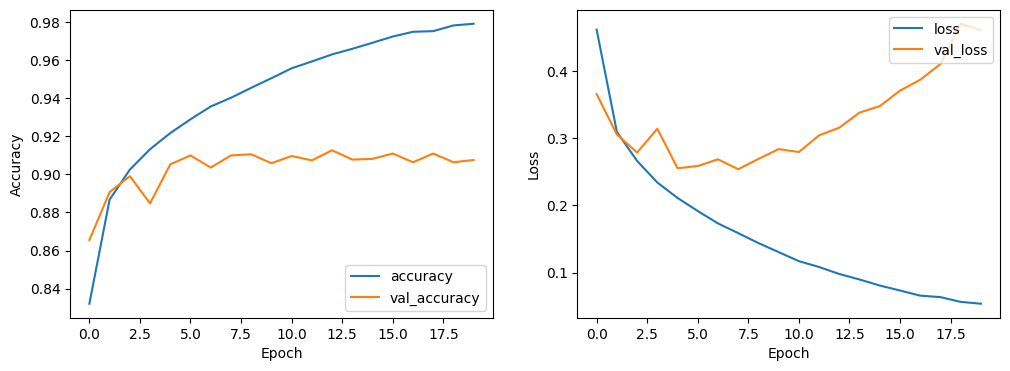

In [11]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

313/313 [==============================] - 1s 2ms/step


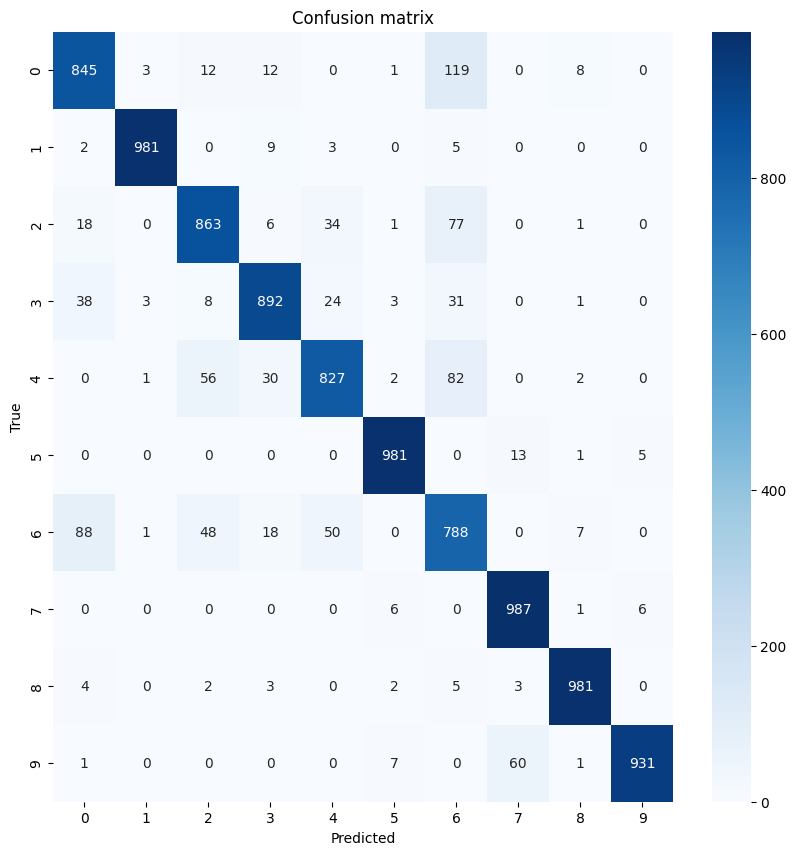

In [12]:
# Plot confusion matrix
preds = model.predict(test_images)
preds = np.argmax(preds, axis=1)
cm = confusion_matrix(test_labels, preds)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


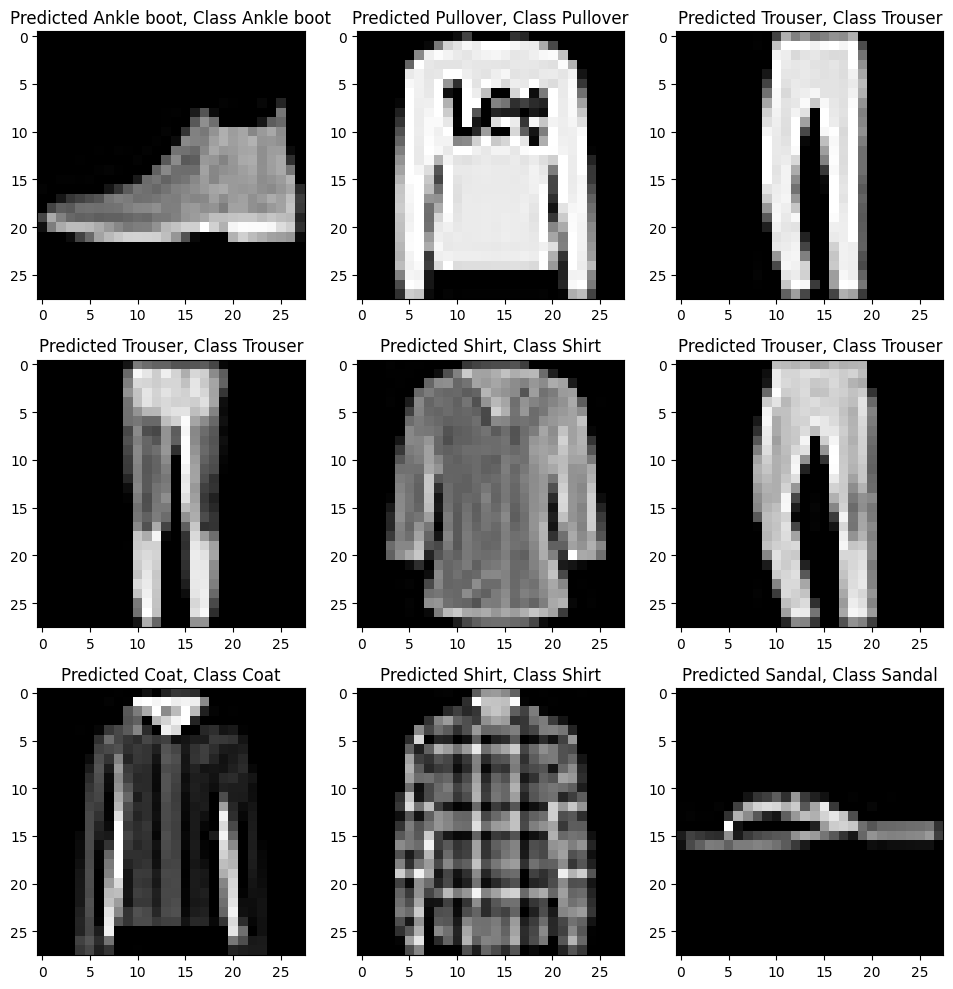

In [13]:
# Display some correctly classified examples
correct = np.where(preds == test_labels)[0]
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[correct[i]].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_names[preds[correct[i]]], class_names[test_labels[correct[i]]]))
    plt.tight_layout()

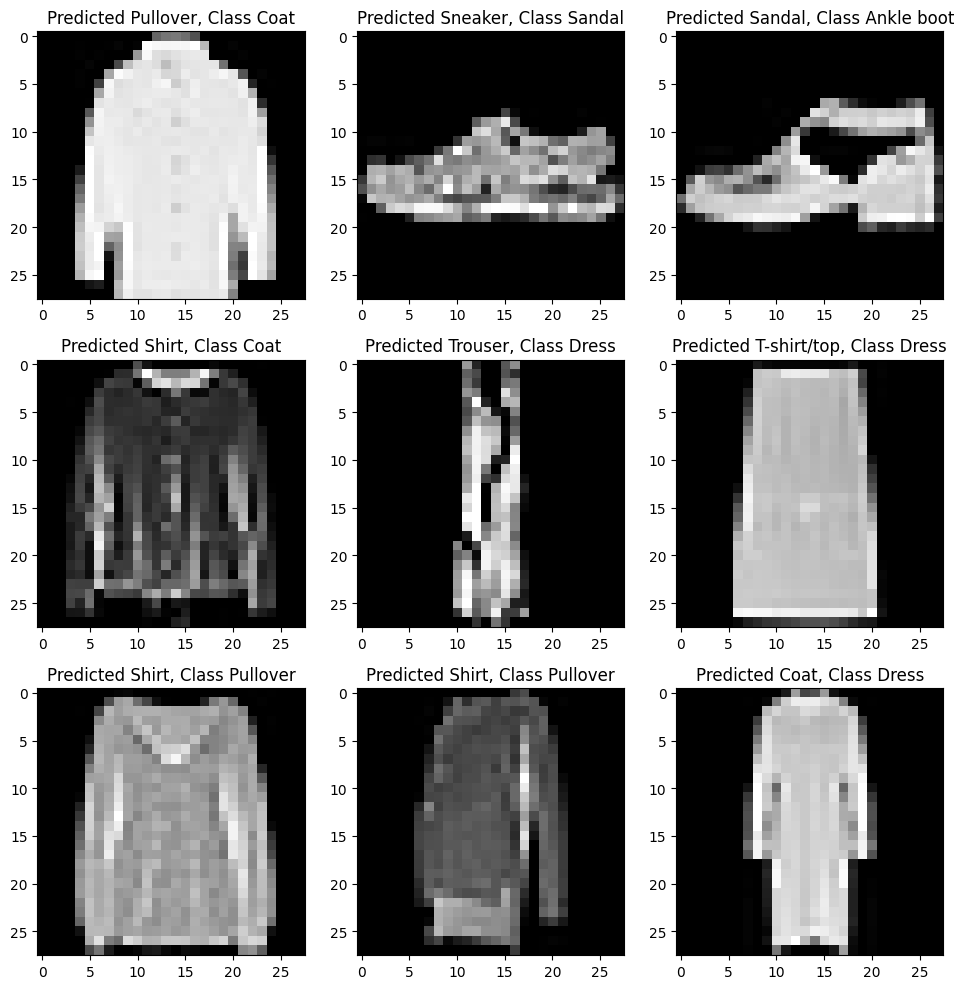

In [14]:
# Display some incorrectly classified examples
incorrect = np.where(preds != test_labels)[0]
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[incorrect[i]].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_names[preds[incorrect[i]]], class_names[test_labels[incorrect[i]]]))
    plt.tight_layout()